# **<center>Lab 02: DECISION TREE</center>**

Full name: Võ Nguyễn Hoàng Kim

Class: 21CLC07

Student ID: 21127090 


## 1. Preparing the data sets

### a. Import necessary libraries for this program

In [7]:
# import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import graphviz

### b. Prepating the data sets
- Read data set in "nursery.data.csv"
- Create the function "preDataSet" to prepare the subsets from data sets by each proportion in "subsetProportion".

In [8]:
# read data from "nursery.data.csv"
label_data = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']

data = pd.read_csv('nursery.data.csv', names = label_data)

# proportion betwenn train/test
listProportion = [(0.4, 0.6), (0.6, 0.4), (0.8 , 0.2), (0.9, 0.1)]
subset = {}

X = data.iloc[:,:-1]
y = data['class']

# Function preDataset for prepare dataset requirement
def preDataSet(trainSize, testSize):
    return train_test_split(X, y, test_size= testSize, train_size= trainSize, random_state=42, shuffle= True, stratify=y)
     
for i in listProportion:
    feature_train, feature_test, label_train, label_test = preDataSet(trainSize=i[0], testSize=i[1]) 
    
    subset[i] = {
        "feature_train" : feature_train,
        "feature_test" : feature_test,
        "label_train" : label_train,
        "label_test" : label_test       
    }


### c.Visualization
- Visualize the distributions of classes in all data sets (include: Original Set, Training set and Test set)


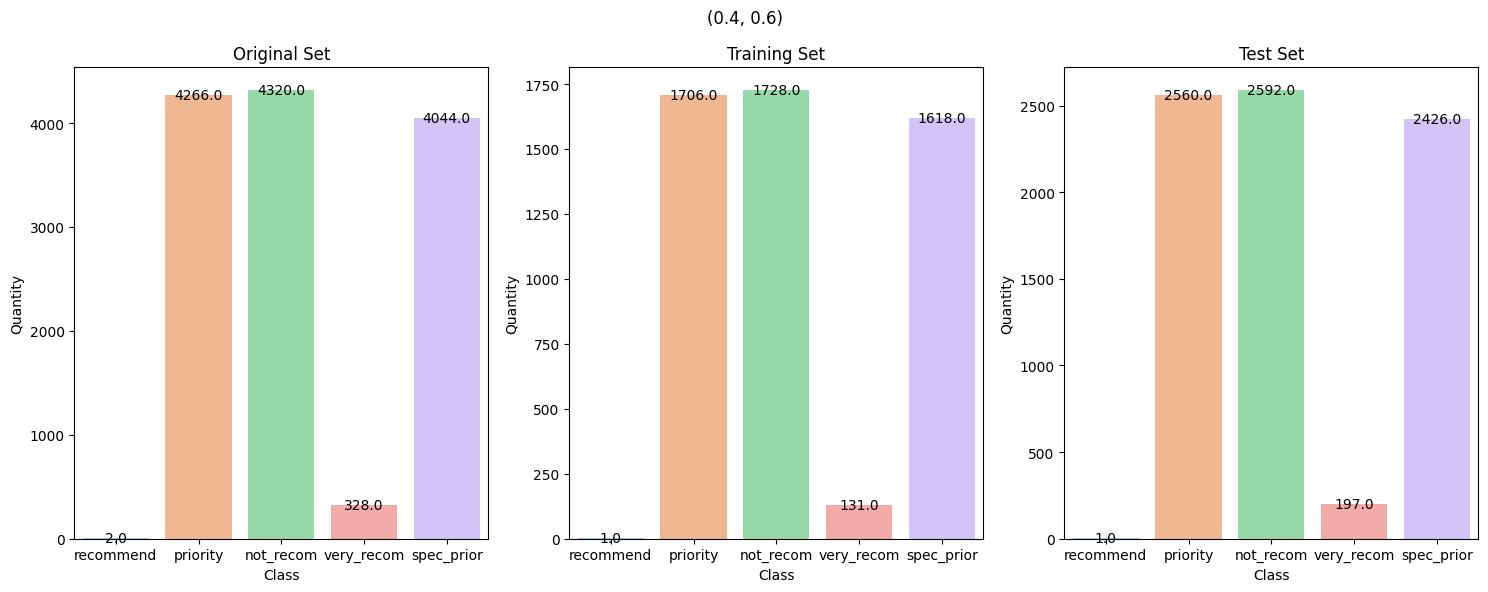

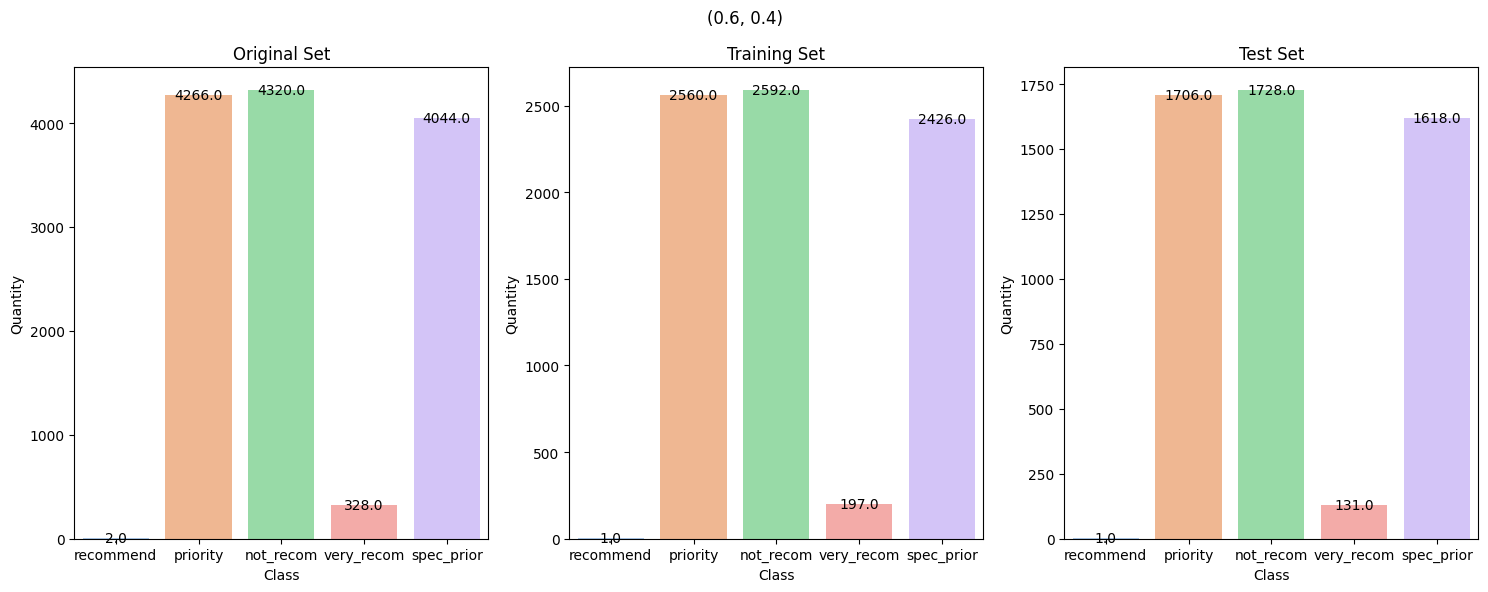

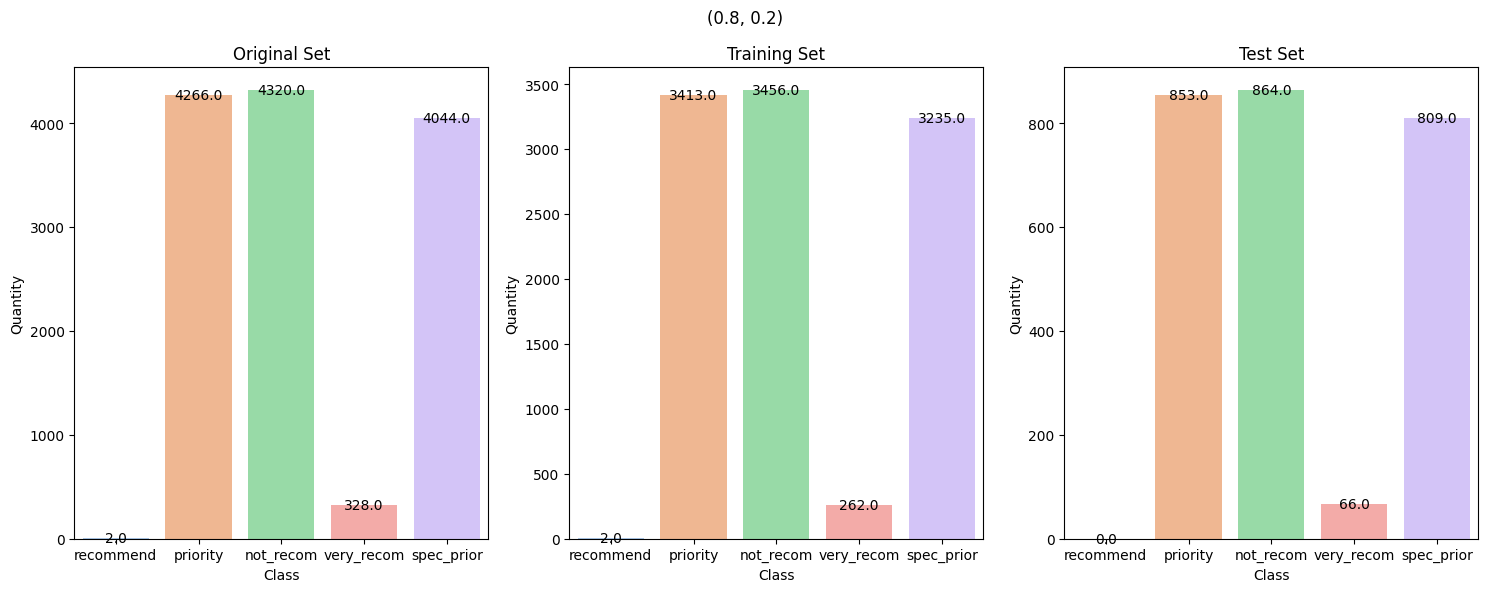

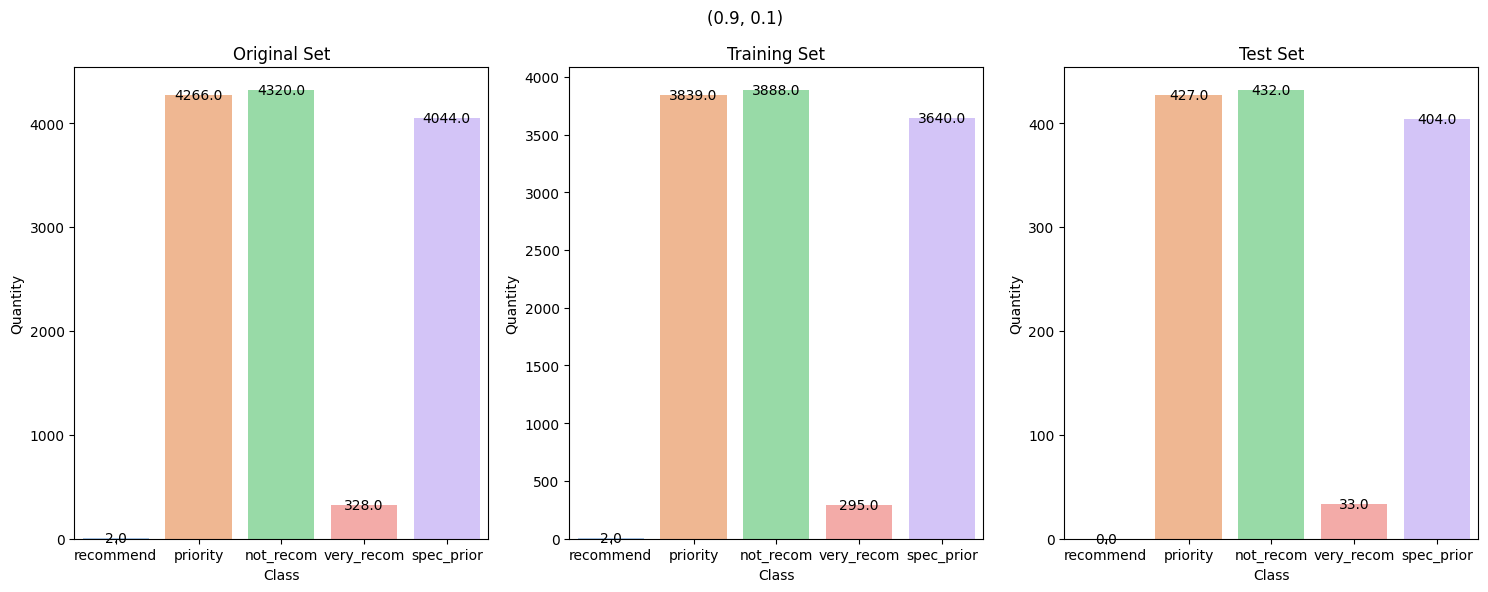

In [9]:
for proportion in listProportion:    
    # Plot the class distributions
    plt.figure(figsize=(15, 6))
    
    # Plot the original set
    plt.subplot(1, 3, 1)
    plt.title("Original Set")
    ax1 = sns.countplot(x=y, palette="pastel", order=['recommend', 'priority', 'not_recom', 'very_recom', 'spec_prior'])
    plt.xlabel("Class")
    plt.ylabel("Quantity")
    for p in ax1.patches:
        ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
    
    # Plot the training set
    plt.subplot(1, 3, 2)
    plt.title("Training Set")
    ax2 = sns.countplot(x=subset[proportion]["label_train"], palette="pastel", order=['recommend', 'priority', 'not_recom', 'very_recom', 'spec_prior'])
    plt.xlabel("Class")
    plt.ylabel("Quantity")
    for p in ax2.patches:
        ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

    # Plot the test set
    plt.subplot(1, 3, 3)
    plt.title("Test Set")
    ax3 = sns.countplot(x=subset[proportion]["label_test"], palette="pastel", order=['recommend', 'priority', 'not_recom', 'very_recom', 'spec_prior'])
    plt.xlabel("Class")
    plt.ylabel("Quantity")
    for p in ax3.patches:
        ax3.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')
    
    plt.suptitle(proportion)
    plt.tight_layout()
    plt.show()

## 2. Building the decision tree classifiers

In [10]:
# Create a LabelEncoder instance for each categorical feature
label_encoders = {}  # Dictionary to store LabelEncoder instances for each feature

# Assuming you have defined 'subset' dictionary containing 'feature_train' and 'label_train' for each subset
for i in subset.keys():
    # Initialize LabelEncoder instances for categorical features
    for feature_name in subset[i]['feature_train'].columns:
        label_encoders[feature_name] = LabelEncoder()
        subset[i]['feature_train'][feature_name] = label_encoders[feature_name].fit_transform(subset[i]['feature_train'][feature_name])
    
    decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
    decisionTree.fit(subset[i]['feature_train'], subset[i]['label_train'])
   
 
    dotData = tree.export_graphviz(decisionTree, 
                                   feature_names=['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health'],
                                   filled=True, special_characters=True)
    Dtree = graphviz.Source(dotData, format='png')
    Dtree.render(directory="./DecisionTree/", filename="Decision_Tree_"+str(i))

## 3. Evaluating the decision tree classifiers

Classification Report for (0.4, 0.6) proportion: 
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      2592
    priority       0.97      0.98      0.97      2560
   recommend       0.00      0.00      0.00         1
  spec_prior       0.98      0.97      0.98      2426
  very_recom       0.95      0.89      0.92       197

    accuracy                           0.98      7776
   macro avg       0.78      0.77      0.77      7776
weighted avg       0.98      0.98      0.98      7776

Confusion Matrix for (0.4, 0.6) proportion: 


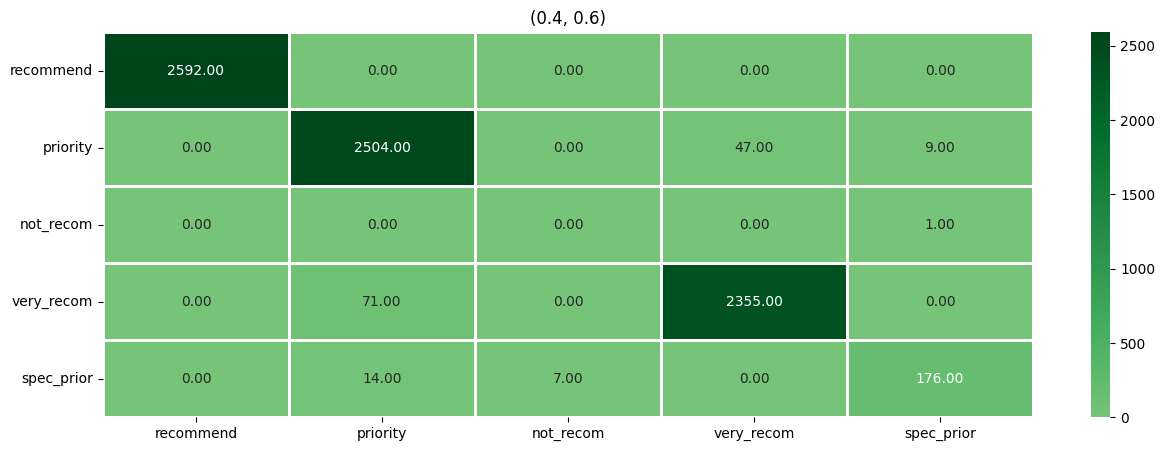


Classification Report for (0.6, 0.4) proportion: 
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      1728
    priority       0.99      0.98      0.99      1706
   recommend       0.00      0.00      0.00         1
  spec_prior       0.99      0.99      0.99      1618
  very_recom       0.94      0.96      0.95       131

    accuracy                           0.99      5184
   macro avg       0.78      0.79      0.78      5184
weighted avg       0.99      0.99      0.99      5184

Confusion Matrix for (0.6, 0.4) proportion: 


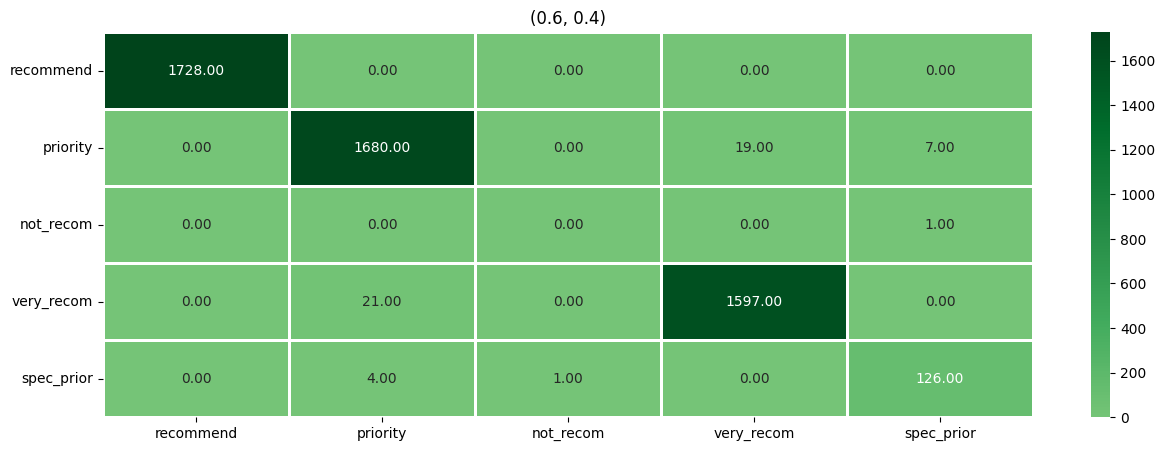


Classification Report for (0.8, 0.2) proportion: 
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
    priority       0.99      0.99      0.99       853
   recommend       0.00      0.00      0.00         0
  spec_prior       0.99      0.99      0.99       809
  very_recom       1.00      0.97      0.98        66

    accuracy                           0.99      2592
   macro avg       0.80      0.79      0.79      2592
weighted avg       1.00      0.99      1.00      2592

Confusion Matrix for (0.8, 0.2) proportion: 


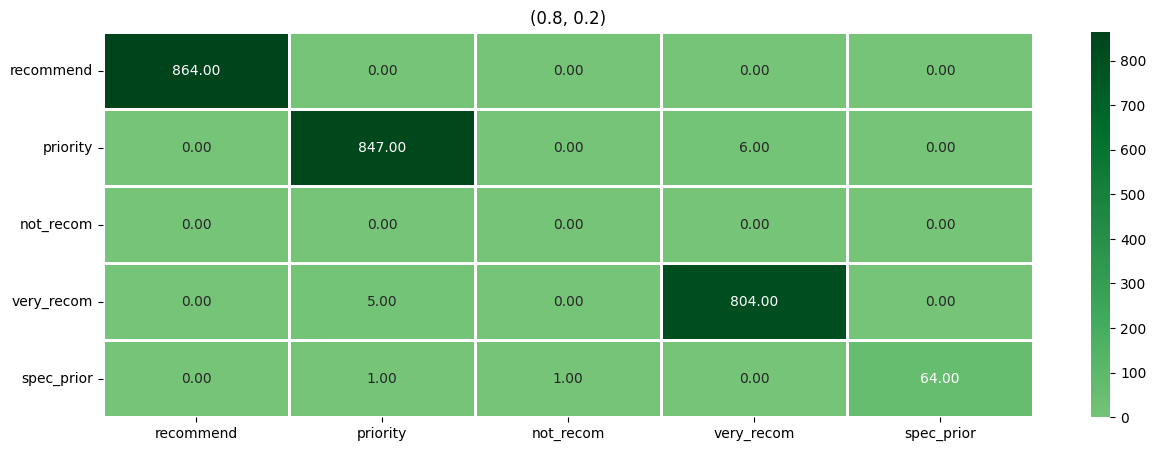


Classification Report for (0.9, 0.1) proportion: 
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       432
    priority       1.00      1.00      1.00       427
   recommend       0.00      0.00      0.00         0
  spec_prior       1.00      1.00      1.00       404
  very_recom       1.00      0.97      0.98        33

    accuracy                           1.00      1296
   macro avg       0.80      0.79      0.80      1296
weighted avg       1.00      1.00      1.00      1296

Confusion Matrix for (0.9, 0.1) proportion: 


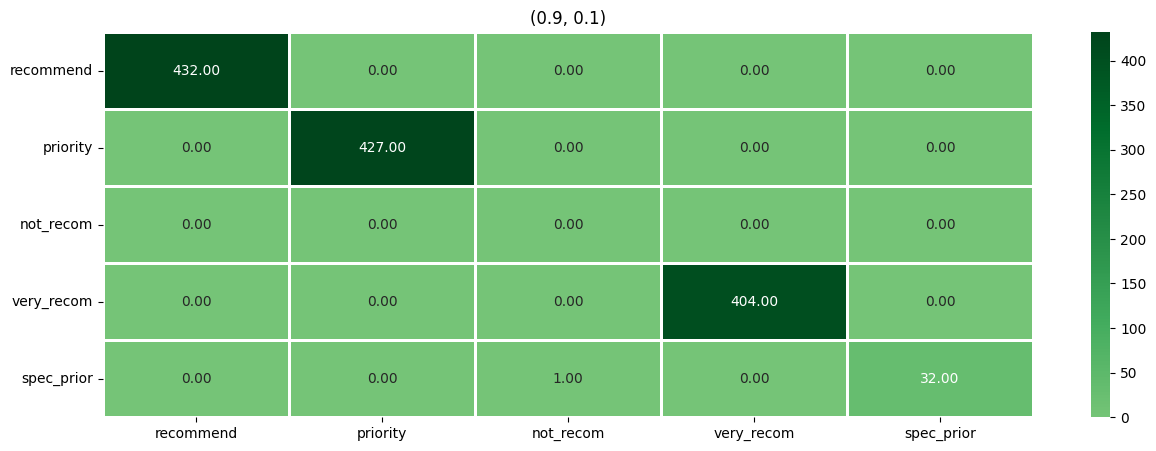

In [11]:
label_encoders_train = {}  # Dictionary to store LabelEncoder instances for each feature
label_encoders_test = {}  # Dictionary to store LabelEncoder instances for each feature

label_class = ['recommend', 'priority', 'not_recom', 'very_recom', 'spec_prior']

for i in subset.keys():
    for feature_name in subset[i]['feature_train'].columns:
        label_encoders_train[feature_name] = LabelEncoder()
        subset[i]['feature_train'][feature_name] = label_encoders_train[feature_name].fit_transform(subset[i]['feature_train'][feature_name])
        
    for feature_name in subset[i]['feature_test'].columns:
        label_encoders_test[feature_name] = LabelEncoder()
        subset[i]['feature_test'][feature_name] = label_encoders_test[feature_name].fit_transform(subset[i]['feature_test'][feature_name])
    
    decisionTree = DecisionTreeClassifier(criterion="entropy")
    decisionTree.fit(subset[i]['feature_train'], subset[i]['label_train'])
    
    prediction = decisionTree.predict(subset[i]['feature_test'])
    
    print("Classification Report for {} proportion: ".format(i))
    report = classification_report(subset[i]['label_test'],prediction, zero_division=0)
    print (report)

    print("Confusion Matrix for {} proportion: ".format(i))
    matrix = confusion_matrix(subset[i]['label_test'], prediction)
    
    plt.figure(figsize=(15, 5))
    plt.title(str(i))
    sns.heatmap(matrix, annot=True, fmt='.2f', cmap='Greens',linewidths=1, xticklabels=label_class, yticklabels=label_class, center=True)
    plt.show()
    print()


## 4. The depth and accuracy of a decision tree

In [12]:
accurancyScore = {}
# Specify the max_depth values to test
max_depth = [None, 2, 3, 4, 5, 6, 7]
reqPropo = (0.8 ,0.2)

# Loop through max_depth values
for depth in max_depth:
    
    # Initialize graph and accuracy lists
    treeList = []
    accurList = []
    
    for feature_name in subset[reqPropo]['feature_train'].columns:
        label_encoders_train[feature_name] = LabelEncoder()
        subset[reqPropo]['feature_train'][feature_name] = label_encoders_train[feature_name].fit_transform(subset[reqPropo]['feature_train'][feature_name])
           
    # Fit decision tree classifier to training set with current max_depth
    decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth,random_state=42)
    
    decisionTree.fit(subset[reqPropo]["feature_train"], subset[reqPropo]["label_train"])

    dotData = tree.export_graphviz(decisionTree, max_depth = depth, 
                            feature_names = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health'],
                            filled=True, special_characters=True)
    myTree = graphviz.Source(dotData, format='png')
    
    # Append tree to list
    treeList.append(myTree)
    
    # Save decision tree in png 
    myTree.render(directory="./DecisionTree_Tree_Accuracy", filename=f"Decision_Tree_MaxDepth_{depth}")
    
    # Make predictions on test set
    predictions = decisionTree.predict(subset[reqPropo]["feature_test"])
    
    # Compute accuracy score
    accuracy = accuracy_score(subset[reqPropo]["label_test"], predictions)

    accurancyScore[depth] = round(accuracy,3)

data = {
    "Max depth" : ['None', '2', '3', '4', '5', '6', '7'],
    "Accuracy" : [item for _,item in accurancyScore.items()]
}

df = pd.DataFrame(data)
print(df)


  Max depth  Accuracy
0      None     0.993
1         2     0.764
2         3     0.825
3         4     0.861
4         5     0.876
5         6     0.891
6         7     0.918
